In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk


In [ ]:
batch_size = 16
img_height = 256
img_width = 256

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/plantvillage/PlantVillage',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=1)

Found 2152 files belonging to 3 classes.
Using 1722 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/plantvillage/PlantVillage',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=1)

Found 2152 files belonging to 3 classes.
Using 430 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


InvalidArgumentError: ignored

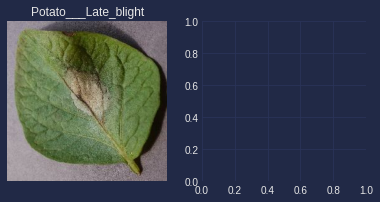

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(1, 256, 256, 3)
(1,)


In [ ]:

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

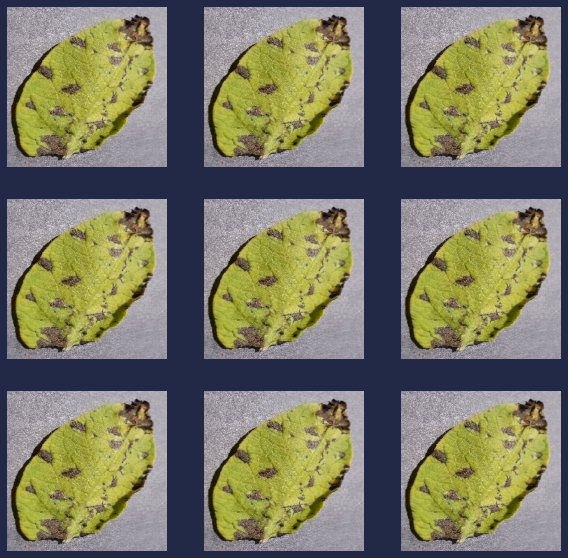

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3),kernel_initializer='HeNormal', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(64, kernel_size=(3, 3),kernel_initializer='HeNormal', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(128, kernel_size=(3, 3),kernel_initializer='HeNormal', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(256, kernel_size=(3, 3),kernel_initializer='HeNormal', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024,kernel_initializer='HeNormal', activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(512,kernel_initializer='HeNormal', activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(len(class_names),activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
  loss='SparseCategoricalCrossentropy',
  metrics=['accuracy'])

In [ ]:
EPOCHS=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS
)

Epoch 1/50
1722/1722 [==============================] - 37s 20ms/step - loss: 0.9288 - accuracy: 0.6899 - val_loss: 0.4828 - val_accuracy: 0.8372
Epoch 2/50
1722/1722 [==============================] - 32s 19ms/step - loss: 0.3685 - accuracy: 0.8542 - val_loss: 0.4461 - val_accuracy: 0.8093
Epoch 3/50
1722/1722 [==============================] - 32s 19ms/step - loss: 0.2824 - accuracy: 0.8943 - val_loss: 0.2778 - val_accuracy: 0.8814
Epoch 4/50
1722/1722 [==============================] - 32s 19ms/step - loss: 0.2067 - accuracy: 0.9245 - val_loss: 0.3904 - val_accuracy: 0.8907
Epoch 5/50
1722/1722 [==============================] - 32s 19ms/step - loss: 0.1755 - accuracy: 0.9373 - val_loss: 0.3110 - val_accuracy: 0.9186
Epoch 6/50
1722/1722 [==============================] - 32s 19ms/step - loss: 0.1573 - accuracy: 0.9454 - val_loss: 0.2240 - val_accuracy: 0.9349
Epoch 7/50
1722/1722 [==============================] - 33s 19ms/step - loss: 0.1352 - accuracy: 0.9518 - val_loss: 0.1675 -

In [ ]:
EPOCHS=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS
)

Epoch 1/5
1722/1722 [==============================] - 32s 19ms/step - loss: 0.0764 - accuracy: 0.9837 - val_loss: 0.0555 - val_accuracy: 0.9837
Epoch 2/5
1722/1722 [==============================] - 32s 19ms/step - loss: 0.0368 - accuracy: 0.9878 - val_loss: 0.1481 - val_accuracy: 0.9721
Epoch 3/5
1722/1722 [==============================] - 32s 19ms/step - loss: 0.0496 - accuracy: 0.9837 - val_loss: 0.2702 - val_accuracy: 0.9651
Epoch 4/5
1722/1722 [==============================] - 32s 19ms/step - loss: 0.0447 - accuracy: 0.9884 - val_loss: 0.2042 - val_accuracy: 0.9767
Epoch 5/5
1722/1722 [==============================] - 32s 19ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.1047 - val_accuracy: 0.9721


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

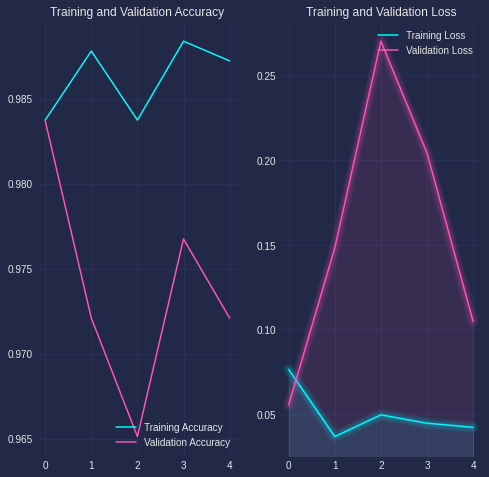

In [ ]:
plt.style.use("cyberpunk")
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
mplcyberpunk.add_glow_effects()
plt.show()

This image most likely belongs to Tomato_Late_blight with a 100.00 percent confidence.


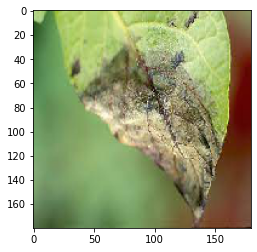

In [ ]:
img = tf.keras.utils.load_img(
    "/content/drive/MyDrive/Colab Notebooks/potato _late_blind.jpeg", target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Tomato_Late_blight with a 90.97 percent confidence.


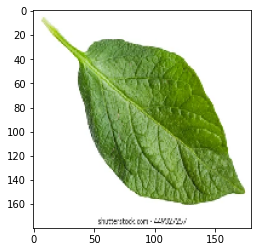

In [ ]:
img = tf.keras.utils.load_img(
    "/content/drive/MyDrive/Colab Notebooks/fresh-green-leaf-potato-plant-260nw-449327257.webp", target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Tomato_Late_blight with a 99.70 percent confidence.


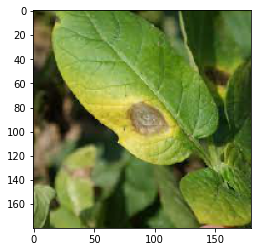

In [ ]:
img = tf.keras.utils.load_img(
    "/content/drive/MyDrive/Colab Notebooks/early_blight.jpeg", target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

first image to predict
actual label: Tomato_Late_blight


ValueError: in user code:

    File "/home/deepak/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/home/deepak/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/deepak/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/home/deepak/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/home/deepak/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/deepak/.local/lib/python3.10/site-packages/keras/engine/input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_3" (type Sequential).
    
    Input 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 12800, but received input with shape (32, 5408)
    
    Call arguments received by layer "sequential_3" (type Sequential):
      • inputs=tf.Tensor(shape=(32, 125, 125, 3), dtype=float32)
      • training=False
      • mask=None


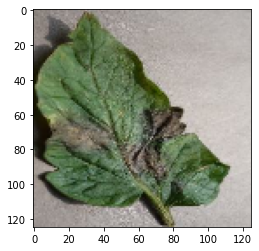

In [ ]:

for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
model.save("/content/drive/MyDrive/potatoes2.h5")